# Import necessary packages and libraries

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import random
import tensorflow
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

The MNIST handwritten digit data is available through inbuilt dataset loader in Tensorflow library

In [ ]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

Shape of the data

In [ ]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


60000 images are present in training data

10000 images are present in test data

In [ ]:
Xtrain.shape

(60000, 28, 28)

In [ ]:
Xtrain[0].shape

(28, 28)

In [ ]:
train_data = []
for i in range(Xtrain.shape[0]):
  train_data.append(Xtrain[i].reshape(-1))


In [ ]:
print(len(train_data))
print(train_data[0].shape)

60000
(784,)


In [ ]:
train_df = pd.DataFrame(train_data)

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df[0]

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: 0, Length: 60000, dtype: int8

In [ ]:
train_df['class'] = ytrain

train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


Test data

In [65]:
test_data = []
for i in range(Xtest.shape[0]):
  test_data.append(Xtest[i].reshape(-1))


In [66]:
print(len(test_data))
print(test_data[0].shape)

10000
(784,)


In [67]:
test_df = pd.DataFrame(test_data)

In [68]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
test_df['class'] = ytest

test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Data Visualization

In [74]:
def vizualize_digits(data, labels, samples=6):
  """
  Takes in number of samples to visualize and plots handwritten digit images randomly chosen  from data
  """
  fig,axs = plt.subplots(samples,1,figsize=(samples * 3 , samples * 5))
  count = 0
  FONT_SIZE = 15
  
  #print(len(data))
  for _ in range(samples):
    choice = random.randint(0,len(data))       # choose a random index
    
    
    #print(data.loc[[choice]].T.shape)
    #print(data.loc[[choice]].T[:-1].shape)

    img = data[choice]
    #img = (np.array(data.loc[[choice]].T[:-1]).reshape(28,28))
    axs[count].title.set_text(labels[choice])
    axs[count].title.set_fontsize(FONT_SIZE)
    axs[count].imshow(img, cmap='gray')
    count += 1

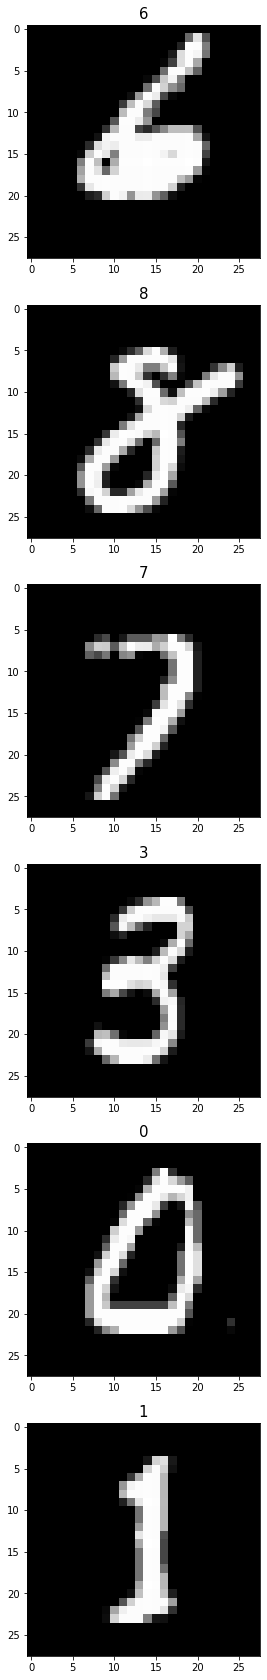

In [76]:
vizualize_digits(Xtrain, ytrain)

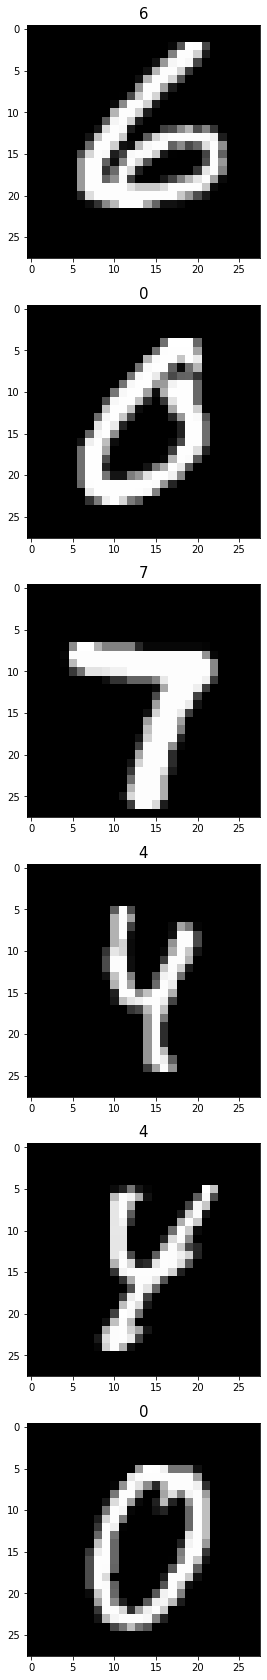

In [77]:
vizualize_digits(Xtest, ytest)